# 졸논(주제 칸)

## 창원동현해정 상받아라~

논문에 대한 설명 적으시오

오케이?

In [104]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt

## 1. 데이터 플롯팅

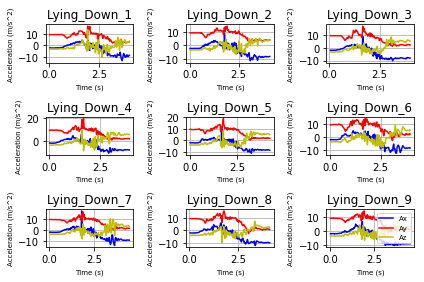

In [141]:
for i in range (1, 9 + 1):
    Data = np.loadtxt("Lying_Down/Lying_Down/Lying_Down" + str(i) + ".txt", delimiter = "\t\t", dtype = numpy.str)
    Time = []
    Ax = []
    Ay = []
    Az = []
    for j in range(1,len(Data)):
        Time.append(float(Data[j][0]))
        Ax.append(float(Data[j][1]))
        Ay.append(float(Data[j][2]))
        Az.append(float(Data[j][3]))
    plt.subplot(3,3,i)
    plt.plot(Time,Ax,'b',label = 'Ax')
    plt.plot(Time,Ay,'r',label = 'Ay')
    plt.plot(Time,Az,'y',label = 'Az')
    plt.xlabel('Time (s)',fontsize=7)
    plt.ylabel('Acceleration (m/s^2)',fontsize=7)
    plt.title('Lying_Down_' + str(i))
    plt.grid(True)
plt.legend(loc=1,prop={'size': 7}) 
plt.tight_layout()
plt.show()

## 2. 데이터 플롯시켜서 중요 데이터 위치 확인 후 갯수에 맞는 데이터만 추출

#### Lying_Down

In [77]:
Time = []
Ax = []
Ay = []
Az = []
for i in range (1, 100 + 1):
    Data = np.loadtxt("Lying_Down/Lying_Down/Lying_Down" + str(i) + ".txt", delimiter = "\t\t", dtype = numpy.str)
    if len(Data) > 110:
        for j in range(11, 110 + 1):
            Time.append(float(Data[j][0]))
            Ax.append(float(Data[j][1]))
            Ay.append(float(Data[j][2]))
            Az.append(float(Data[j][3]))

In [78]:
data = {
    "time" : Time,
    "Ax" : Ax,
    "Ay" : Ay,
    "Az" : Az
}
df = pd.DataFrame(data)

In [79]:
df.to_csv("xld") #xld는 x값 lying down 약자

#### Lying_Down_Front

In [80]:
Time = []
Ax = []
Ay = []
Az = []
for i in range (1, 100 + 1):
    Data = np.loadtxt("Lying_Down_Front/Lying_Down_Front/Lying_Down_Front" + str(i) + ".txt", delimiter = "\t\t", dtype = numpy.str)
    if len(Data) > 110:
        for j in range(11, 110 + 1):
            Time.append(float(Data[j][0]))
            Ax.append(float(Data[j][1]))
            Ay.append(float(Data[j][2]))
            Az.append(float(Data[j][3]))

In [81]:
data = {
    "time" : Time,
    "Ax" : Ax,
    "Ay" : Ay,
    "Az" : Az
}
df = pd.DataFrame(data)

In [82]:
df.to_csv("xldf")

#### Sitting_Down

In [86]:
Time = []
Ax = []
Ay = []
Az = []
for i in range (1, 70 + 1):
    Data = np.loadtxt("Lying_Down/Lying_Down/Lying_Down" + str(i) + ".txt", delimiter = "\t\t", dtype = numpy.str)
    if len(Data) > 100:
        for j in range(1, 100 + 1):
            Time.append(float(Data[j][0]))
            Ax.append(float(Data[j][1]))
            Ay.append(float(Data[j][2]))
            Az.append(float(Data[j][3]))

In [87]:
data = {
    "time" : Time,
    "Ax" : Ax,
    "Ay" : Ay,
    "Az" : Az
}
df = pd.DataFrame(data)

In [88]:
df.to_csv("xsd")

#### Standing_Up

In [89]:
Time = []
Ax = []
Ay = []
Az = []
for i in range (1, 70 + 1):
    Data = np.loadtxt("Lying_Down/Lying_Down/Lying_Down" + str(i) + ".txt", delimiter = "\t\t", dtype = numpy.str)
    if len(Data) > 100:
        for j in range(1, 100 + 1):
            Time.append(float(Data[j][0]))
            Ax.append(float(Data[j][1]))
            Ay.append(float(Data[j][2]))
            Az.append(float(Data[j][3]))

In [90]:
data = {
    "time" : Time,
    "Ax" : Ax,
    "Ay" : Ay,
    "Az" : Az
}
df = pd.DataFrame(data)

In [91]:
df.to_csv("xsu")

## 3. Data size 확인 후 Labeling

In [151]:
xld = np.loadtxt("xld.csv", delimiter=",", dtype=np.float32, skiprows=1)
xldf = np.loadtxt("xldf.csv", delimiter=",", dtype=np.float32, skiprows=1)
xsd = np.loadtxt("xsd.csv", delimiter=",", dtype=np.float32, skiprows=1)
xsu = np.loadtxt("xsu.csv", delimiter=",", dtype=np.float32, skiprows=1)

print(xld.shape, xldf.shape, xsd.shape, xsu.shape)

(7500, 4) (9900, 4) (6400, 4) (6400, 4)


In [171]:
x_data = np.vstack([xld, xldf, xsd, xsu])
x_data.shape

(30200, 4)

In [190]:
y_data = np.array([[0]] * 75 + [[1]] * 99 + [[2]] * 64 + [[3]] * 64) # y값 Labeling
y_data.shape # training dat set m 은 302

(302, 1)

## 4. LSTMs for Human Activity Recognition

Compared to a classical approach, using a Recurrent Neural Networks (RNN) with Long Short-Term Memory cells (LSTMs) require no or almost no feature engineering. Data can be fed directly into the neural network who acts like a black box, modeling the problem correctly. Other research on the activity recognition dataset used mostly use a big amount of feature engineering, which is rather a signal processing approach combined with classical data science techniques. The approach here is rather very simple in terms of how much did the data was preprocessed.

### What is an RNN?
As explained in this article, an RNN takes many input vectors to process them and output other vectors. It can be roughly pictured like in the image below, imagining each rectangle has a vectorial depth and other special hidden quirks in the image below. In our case, the "many to one" architecture is used: we accept time series of feature vectors (one vector per time step) to convert them to a probability vector at the output for classification. Note that a "one to one" architecture would be a standard feedforward neural network.

![Alt text](rnn1.jpg)

In [173]:
# Input Data 

training_data_count = len(x_data)  # 7352 training series (with 50% overlap between each serie)
test_data_count = len(x_data)  # 2947 testing series
n_steps = 100  # 100 timesteps per series
n_input = 3  # 3 input parameters per timestep


# LSTM Neural Network's internal structure

n_hidden = 32 # Hidden layer num of features
n_classes = 4 # Total classes (should go up, or should go down)


# Training 

learning_rate = 0.0025
lambda_loss_amount = 0.0015
training_iters = training_data_count * 300  # Loop 300 times on the dataset
batch_size = 30
display_iter = 30000  # To show test set accuracy during training

In [174]:
def LSTM_RNN(_X, _weights, _biases):
    # Function returns a tensorflow LSTM (RNN) artificial neural network from given parameters. 
    # Moreover, two LSTM cells are stacked which adds deepness to the neural network. 
    # Note, some code of this notebook is inspired from an slightly different 
    # RNN architecture used on another dataset, some of the credits goes to 
    # "aymericdamien" under the MIT license.

    # (NOTE: This step could be greatly optimised by shaping the dataset once
    # input shape: (batch_size, n_steps, n_input)
    _X = tf.transpose(_X, [1, 0, 2])  # permute n_steps and batch_size
    # Reshape to prepare input to hidden activation
    _X = tf.reshape(_X, [-1, n_input]) 
    # new shape: (n_steps*batch_size, n_input)
    
    # Linear activation
    _X = tf.nn.relu(tf.matmul(_X, _weights['hidden']) + _biases['hidden'])
    # Split data because rnn cell needs a list of inputs for the RNN inner loop
    _X = tf.split(_X, n_steps, 0) 
    # new shape: n_steps * (batch_size, n_hidden)

    # Define two stacked LSTM cells (two recurrent layers deep) with tensorflow
    lstm_cell_1 = tf.contrib.rnn.BasicLSTMCell(n_hidden, forget_bias=1.0, state_is_tuple=True)
    lstm_cell_2 = tf.contrib.rnn.BasicLSTMCell(n_hidden, forget_bias=1.0, state_is_tuple=True)
    lstm_cells = tf.contrib.rnn.MultiRNNCell([lstm_cell_1, lstm_cell_2], state_is_tuple=True)
    # Get LSTM cell output
    outputs, states = tf.contrib.rnn.static_rnn(lstm_cells, _X, dtype=tf.float32)

    # Get last time step's output feature for a "many to one" style classifier, 
    # as in the image describing RNNs at the top of this page
    lstm_last_output = outputs[-1]
    
    # Linear activation
    return tf.matmul(lstm_last_output, _weights['out']) + _biases['out']


def extract_batch_size(_train, step, batch_size):
    # Function to fetch a "batch_size" amount of data from "(X|y)_train" data. 
    
    shape = list(_train.shape)
    shape[0] = batch_size
    batch_s = np.empty(shape)

    for i in range(batch_size):
        # Loop index
        index = ((step-1)*batch_size + i) % len(_train)
        batch_s[i] = _train[index] 

    return batch_s


def one_hot(y_):
    # Function to encode output labels from number indexes 
    # e.g.: [[5], [0], [3]] --> [[0, 0, 0, 0, 0, 1], [1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0]]
    
    y_ = y_.reshape(len(y_))
    n_values = int(np.max(y_)) + 1
    return np.eye(n_values)[np.array(y_, dtype=np.int32)]  # Returns FLOATS

In [181]:
# Graph input/output
x = tf.placeholder(tf.float32, [None, n_steps, n_input])
y = tf.placeholder(tf.float32, [None, n_classes])

# Graph weights
weights = {
    'hidden': tf.Variable(tf.random_normal([n_input, n_hidden])), # Hidden layer weights
    'out': tf.Variable(tf.random_normal([n_hidden, n_classes], mean=1.0))
}
biases = {
    'hidden': tf.Variable(tf.random_normal([n_hidden])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

pred = LSTM_RNN(x, weights, biases)

# Loss, optimizer and evaluation
l2 = lambda_loss_amount * sum(
    tf.nn.l2_loss(tf_var) for tf_var in tf.trainable_variables()
) # L2 loss prevents this overkill neural network to overfit the data
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=pred)) + l2 # Softmax loss
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost) # Adam Optimizer

correct_pred = tf.equal(tf.argmax(pred,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

NameError: name 'tf' is not defined

In [ ]:
# To keep track of training's performance
test_losses = []
test_accuracies = []
train_losses = []
train_accuracies = []

# Launch the graph
sess = tf.InteractiveSession(config=tf.ConfigProto(log_device_placement=True))
init = tf.global_variables_initializer()
sess.run(init)

# Perform Training steps with "batch_size" amount of example data at each loop
step = 1
while step * batch_size <= training_iters:
    batch_xs =         extract_batch_size(X_train, step, batch_size)
    batch_ys = one_hot(extract_batch_size(y_train, step, batch_size))

    # Fit training using batch data
    _, loss, acc = sess.run(
        [optimizer, cost, accuracy],
        feed_dict={
            x: batch_xs, 
            y: batch_ys
        }
    )
    train_losses.append(loss)
    train_accuracies.append(acc)
    
    # Evaluate network only at some steps for faster training: 
    if (step*batch_size % display_iter == 0) or (step == 1) or (step * batch_size > training_iters):
        
        # To not spam console, show training accuracy/loss in this "if"
        print("Training iter #" + str(step*batch_size) + \
              ":   Batch Loss = " + "{:.6f}".format(loss) + \
              ", Accuracy = {}".format(acc))
        
        # Evaluation on the test set (no learning made here - just evaluation for diagnosis)
        loss, acc = sess.run(
            [cost, accuracy], 
            feed_dict={
                x: X_test,
                y: one_hot(y_test)
            }
        )
        test_losses.append(loss)
        test_accuracies.append(acc)
        print("PERFORMANCE ON TEST SET: " + \
              "Batch Loss = {}".format(loss) + \
              ", Accuracy = {}".format(acc))

    step += 1

print("Optimization Finished!")

# Accuracy for test data

one_hot_predictions, accuracy, final_loss = sess.run(
    [pred, accuracy, cost],
    feed_dict={
        x: X_test,
        y: one_hot(y_test)
    }
)

test_losses.append(final_loss)
test_accuracies.append(accuracy)

print("FINAL RESULT: " + \
      "Batch Loss = {}".format(final_loss) + \
      ", Accuracy = {}".format(accuracy))

# 왜 잘 안될까?
- 우선 터무니 없는 데이터 수
- frequency의 불규칙성